In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Loading and Preprocessing (1 marks)¶

Load the Iris dataset from sklearn.

Drop the species column since this is a clustering problem.


In [6]:
data=sns.load_dataset("iris")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
data.duplicated().sum()

1

In [16]:
data=data.drop_duplicates()
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [18]:
features=data.drop("species",axis=1)
features

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
features.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


From the above ststistical measures, there is slight difference between mean and median of petal length column. 

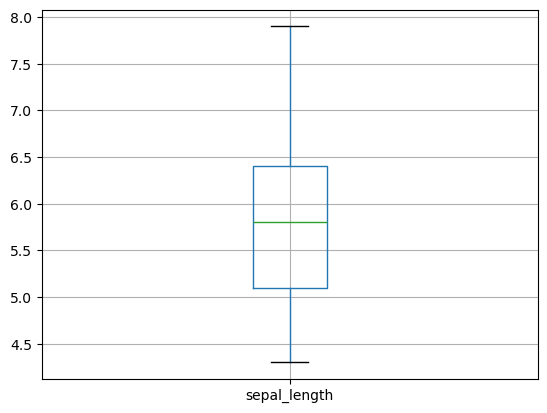

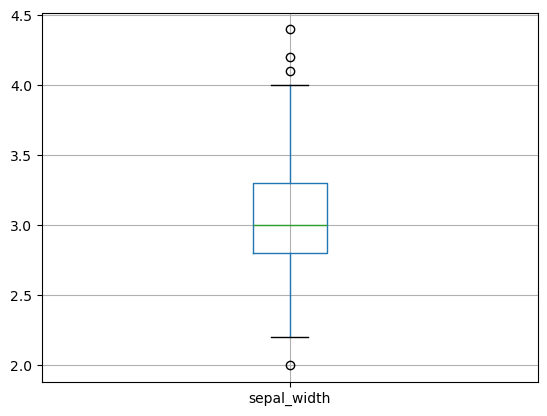

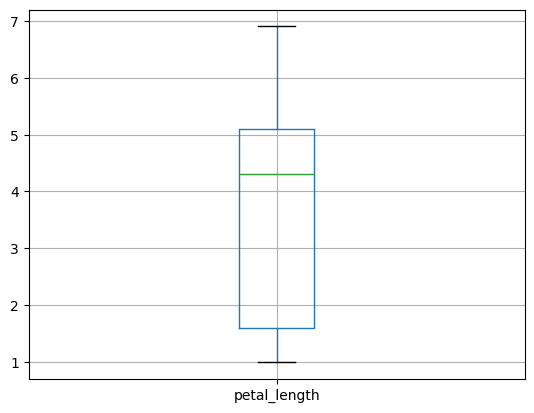

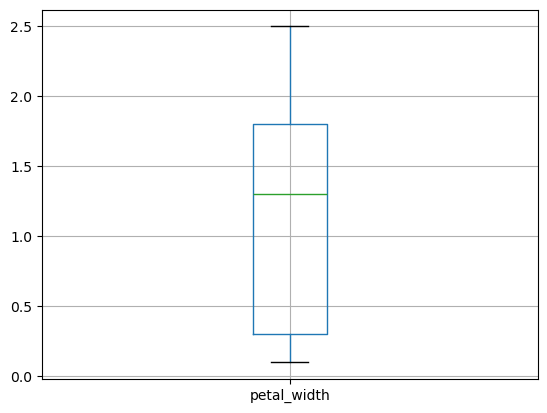

In [23]:
numericals=features.select_dtypes("number")
for i in numericals:
    features.boxplot(i)
    plt.show()

There are few outliers in the data.

In [26]:
# To find the outliers using IQR method
def find_outliers_iqr(features):
    numericals=features.select_dtypes("number")
    outliers= {}
    for column in numericals:
        Q1= numericals[column].quantile(0.25)
        Q3= numericals[column].quantile(0.75)
        IQR=Q3-Q1
        lower_whisker=Q1 - 1.5*IQR
        upper_whisker=Q3 + 1.5*IQR
        outliers[column] = features[(numericals[column] < lower_whisker) | (numericals[column] > upper_whisker)]
        
    return outliers    
outliers_dict=find_outliers_iqr(features)
for column,outliers in outliers_dict.items():
    print("outliers in",column,":",outliers)

outliers in sepal_length : Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width]
Index: []
outliers in sepal_width :     sepal_length  sepal_width  petal_length  petal_width
15           5.7          4.4           1.5          0.4
32           5.2          4.1           1.5          0.1
33           5.5          4.2           1.4          0.2
60           5.0          2.0           3.5          1.0
outliers in petal_length : Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width]
Index: []
outliers in petal_width : Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width]
Index: []


In [28]:
# To capp the outliers
def cap_outliers(features):
    features_capped=features.copy()
    numericals=features.select_dtypes("number")
    
    for column in numericals:
        Q1=numericals[column].quantile(0.25)
        Q3=numericals[column].quantile(0.75)
        IQR=Q3-Q1
        lower_whisker=Q1 - 1.5*IQR
        upper_whisker=Q3 + 1.5*IQR
        features_capped[column] =features[column].apply(lambda x:lower_whisker if x < lower_whisker else upper_whisker if x > upper_whisker else x) 
    return features_capped

features_capped=cap_outliers(features)
features_capped        

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [30]:
skewness=features_capped.skew()
skewness

sepal_length    0.312826
sepal_width     0.182187
petal_length   -0.263101
petal_width    -0.090076
dtype: float64

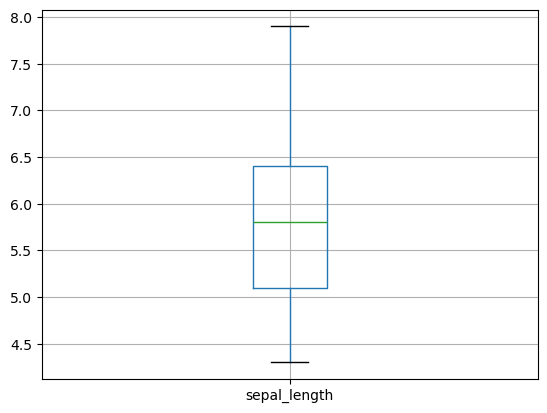

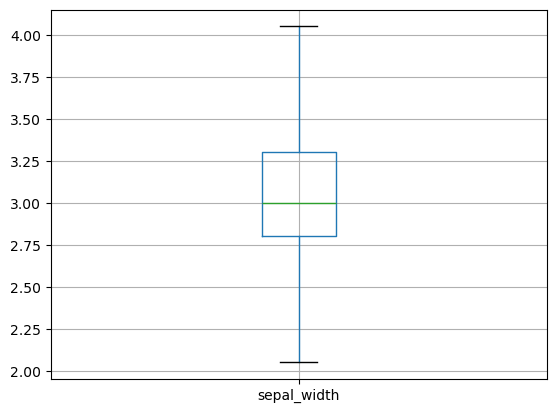

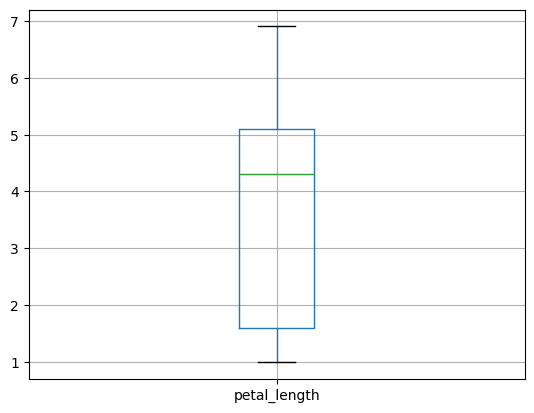

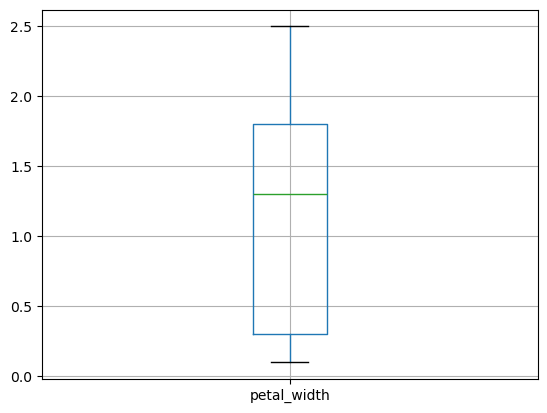

In [32]:
# checking for outliers after capping the data
numericals=features_capped.select_dtypes("number")
for column in numericals:
    numericals.boxplot(column)
    plt.show()

Outliers are capped successfully

In [38]:
# To check the correlation between the features
corr=features_capped.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.119293,0.873738,0.820620
sepal_width,-0.119293,1.000000,-0.425425,-0.362030
petal_length,0.873738,-0.425425,1.000000,0.962772
petal_width,0.820620,-0.362030,0.962772,1.000000


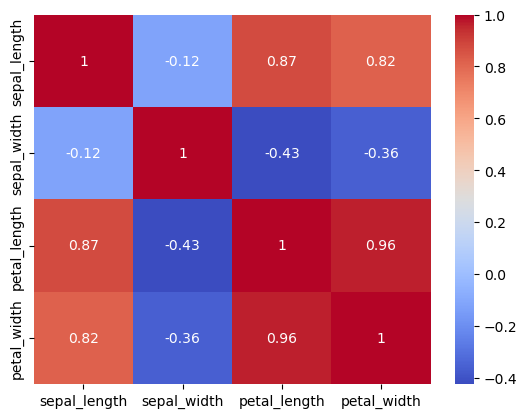

In [40]:
# visually representing the correlation using heatmap
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

Most of the features are  highly and possitively correlation with other features except sepal width.sepal width has a negative correlation with others.

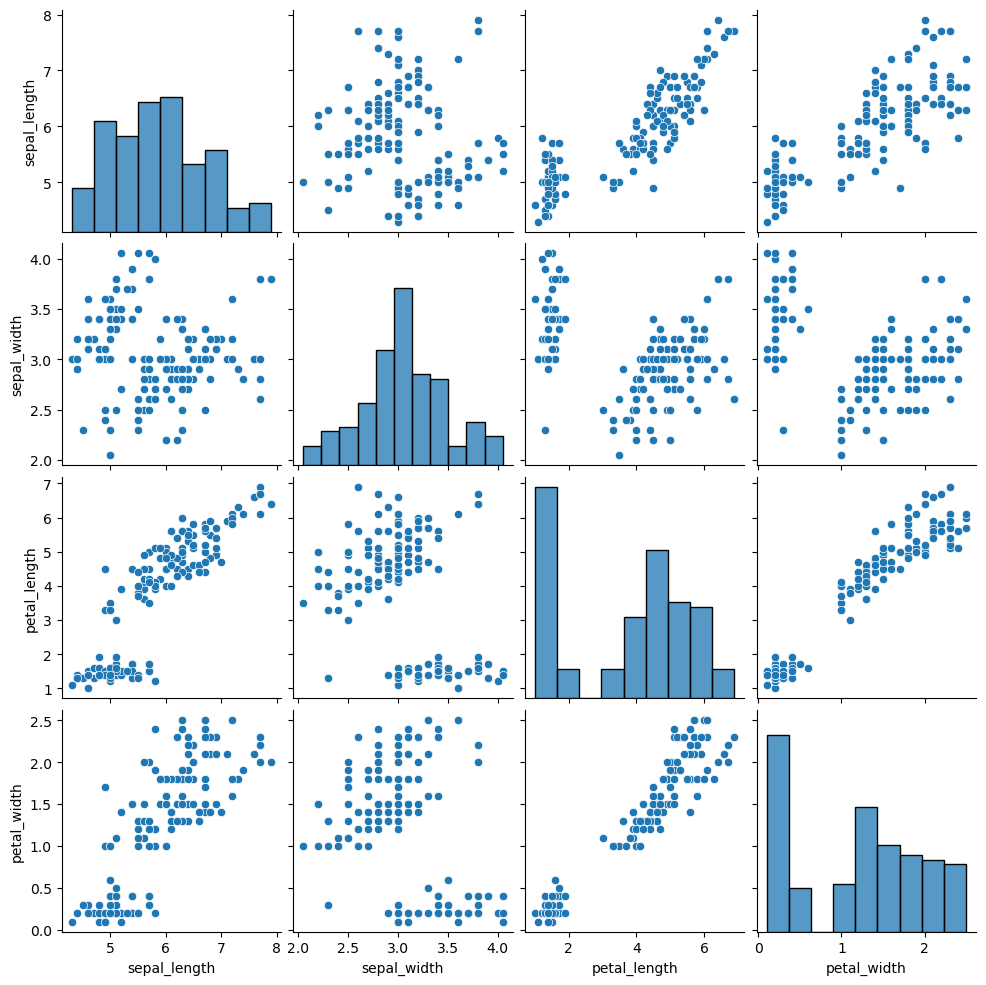

In [43]:
sns.pairplot(features_capped)
plt.show()

In [51]:
#scaling the features using standard scaler
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
scaled_features=std_scaler.fit_transform(features_capped)
scaled_features

array([[-0.8980334 ,  1.04531179, -1.33325507, -1.30862368],
       [-1.13956224, -0.13283841, -1.33325507, -1.30862368],
       [-1.38109108,  0.33842167, -1.39001364, -1.30862368],
       [-1.5018555 ,  0.10279163, -1.2764965 , -1.30862368],
       [-1.01879782,  1.28094183, -1.33325507, -1.30862368],
       [-0.53574014,  1.98783195, -1.16297935, -1.04548613],
       [-1.5018555 ,  0.80968175, -1.33325507, -1.17705491],
       [-1.01879782,  0.80968175, -1.2764965 , -1.30862368],
       [-1.74338434, -0.36846845, -1.33325507, -1.30862368],
       [-1.13956224,  0.10279163, -1.2764965 , -1.44019246],
       [-0.53574014,  1.51657187, -1.2764965 , -1.30862368],
       [-1.26032666,  0.80968175, -1.21973792, -1.30862368],
       [-1.26032666, -0.13283841, -1.33325507, -1.44019246],
       [-1.86414876, -0.13283841, -1.50353079, -1.44019246],
       [-0.05268246,  2.223462  , -1.44677222, -1.30862368],
       [-0.17344688,  2.34127702, -1.2764965 , -1.04548613],
       [-0.53574014,  1.

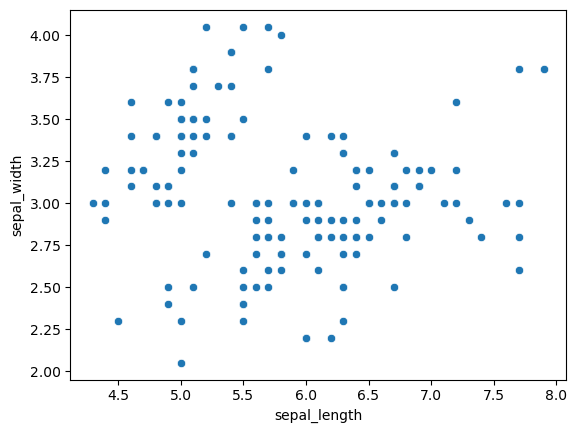

In [47]:
sns.scatterplot(x=features_capped["sepal_length"],y=features_capped["sepal_width"])
plt.show()

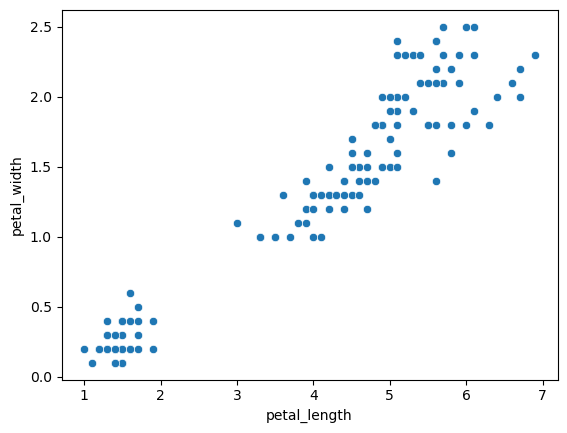

In [49]:
sns.scatterplot(x=features_capped["petal_length"],y=features_capped["petal_width"])
plt.show()

This data set may contain 2 or 3 clusters.

### 2.Clustering Algorithm Implementation (8 marks)
Implement the following two clustering algorithms:


#### A) KMeans Clustering (4 marks)
* Provide a brief description of how KMeans clustering works.
* Explain why KMeans clustering might be suitable for the Iris dataset.
* Apply KMeans clustering to the preprocessed Iris dataset and visualize the clusters.


Clustering is an unsupervised learning technique used to group similar data points together into clusters based on their features. KMeans Clustering  is an algorithm that divides the unlabeled dataset in to "K" different clusters  in such a way that each dataset belongs only one group that has
similar properties.The main aim of
this algorithm is to minimize the sum of distances between the data point and their corresponding
clusters.K-Means algorithm  Uses when we know the number of clusters and  they are spherical.we can use the elbow method to find the number of clusters.

In [57]:
from sklearn.cluster import KMeans

In [59]:
# using elbow method, we are finding the number of clusters
wcss=[]
k_values=range(1,5)
for i in k_values:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit_predict(scaled_features)
    wcss.append(kmeans.inertia_)

C:\Users\anjan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anjan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anjan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anjan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

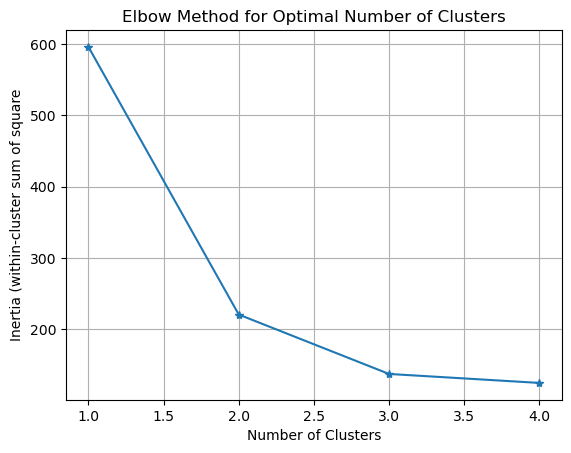

In [61]:
plt.plot(k_values,wcss,marker="*")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (within-cluster sum of square")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.grid(True)
plt.show()

In [63]:
kmeans.inertia_

124.76391440010235

### The optimal number of clusters is 3


In [66]:
kmeans=KMeans(n_clusters=3)
kmeans.fit_predict(scaled_features)

C:\Users\anjan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1])

In [68]:
data["kmeans_cluster"]=kmeans.fit_predict(scaled_features)
data

C:\Users\anjan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anjan\AppData\Local\Temp\ipykernel_8928\1335944122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["kmeans_cluster"]=kmeans.fit_predict(scaled_features)


,sepal_length,sepal_width,petal_length,petal_width,species,kmeans_cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


In [70]:
features["kmeans_cluster"]=kmeans.fit_predict(scaled_features)
features

C:\Users\anjan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,kmeans_cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


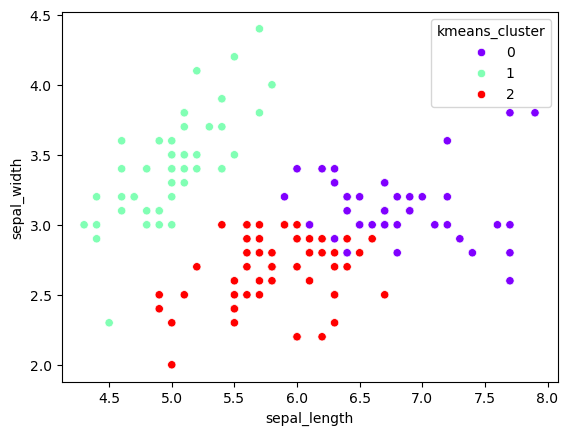

In [72]:
sns.scatterplot(x=features["sepal_length"],y=features["sepal_width"],hue=features["kmeans_cluster"],palette="rainbow")
plt.show()

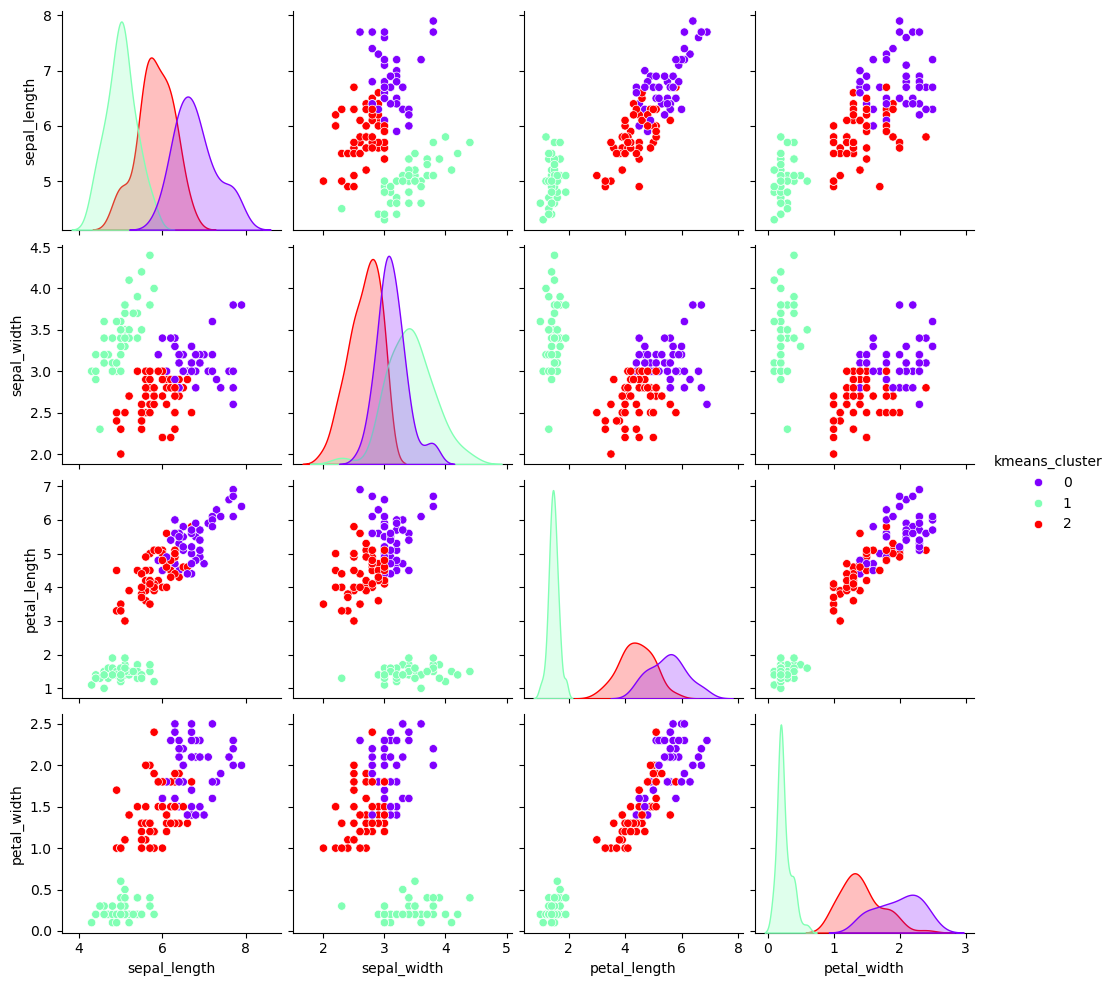

In [74]:
sns.pairplot(features,hue="kmeans_cluster",palette="rainbow")
plt.show()

#### B) Hierarchical Clustering (4 marks)

* Provide a brief description of how Hierarchical clustering works.
* Explain why Hierarchical clustering might be suitable for the Iris dataset.
* Apply Hierarchical clustering to the preprocessed Iris dataset and visualize the clusters.


Hierarchical clustering is an unsupervised machine learning algorithm that groups data points into a tree-like structure (dendrogram), which helps in visualizing how clusters are formed.
In Agglomerative Clustering,Each data point starts as its own cluster then the Pairs of clusters are merged iteratively based on their similarity(distance).The process continues until all points belong to a single cluster or a predefined number of clusters (k) is reached.
Unlike K-means, in hierarchial clustering we don't need to specifi the number of clusters(k), the dendrogram helps us to decide the optimal number of clusters.Hierarchical clustering works well with small sized datasets. since "Iris" dataset only contains 150 rows, this algorithm suits really well .The hierarchical clustering can detect non-spherical clusters and the dendrogram shows how clusters are merged, providing a visual hierarchy of species similarities.

In [80]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

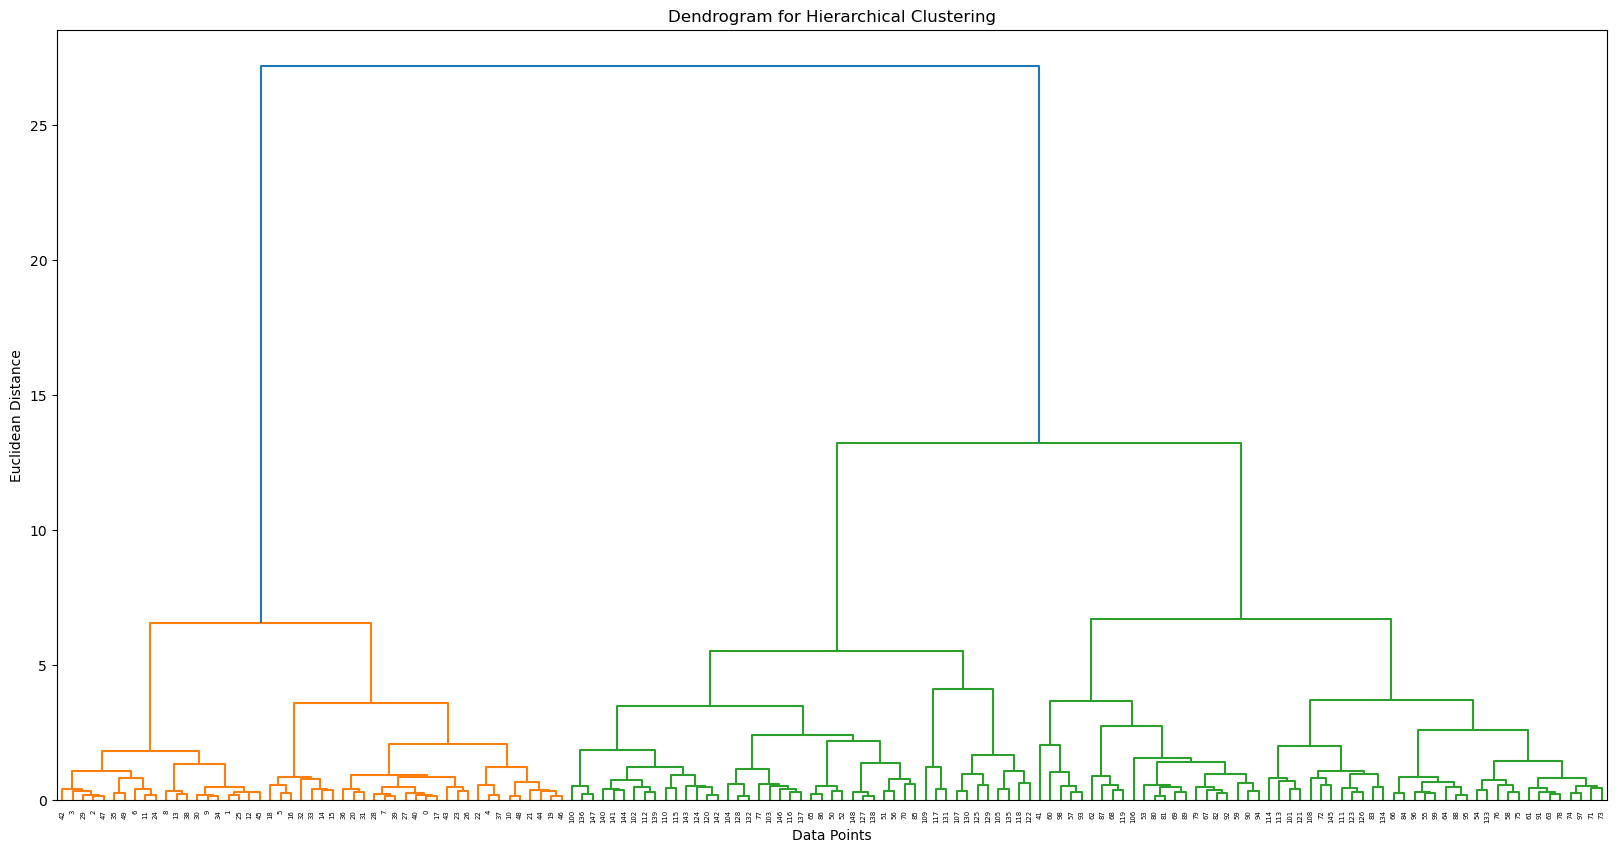

In [82]:
plt.figure(figsize=(20,10))
linkage_matrix=linkage(scaled_features,method="ward")
dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [84]:
agg_cluster=AgglomerativeClustering(n_clusters=3)
agg_cluster.fit_predict(scaled_features)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2], dtype=int64)

In [86]:
data["agg_cluster"]=agg_cluster.fit_predict(scaled_features)
data

C:\Users\anjan\AppData\Local\Temp\ipykernel_8928\1099957643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["agg_cluster"]=agg_cluster.fit_predict(scaled_features)


,sepal_length,sepal_width,petal_length,petal_width,species,kmeans_cluster,agg_cluster
0,5.1,3.5,1.4,0.2,setosa,1,1
1,4.9,3.0,1.4,0.2,setosa,1,1
2,4.7,3.2,1.3,0.2,setosa,1,1
3,4.6,3.1,1.5,0.2,setosa,1,1
4,5.0,3.6,1.4,0.2,setosa,1,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0,2
146,6.3,2.5,5.0,1.9,virginica,2,0
147,6.5,3.0,5.2,2.0,virginica,0,2
148,6.2,3.4,5.4,2.3,virginica,0,2


In [88]:
features["agg_cluster"]=agg_cluster.fit_predict(scaled_features)
features

,sepal_length,sepal_width,petal_length,petal_width,kmeans_cluster,agg_cluster
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,0,2
148,6.2,3.4,5.4,2.3,0,2


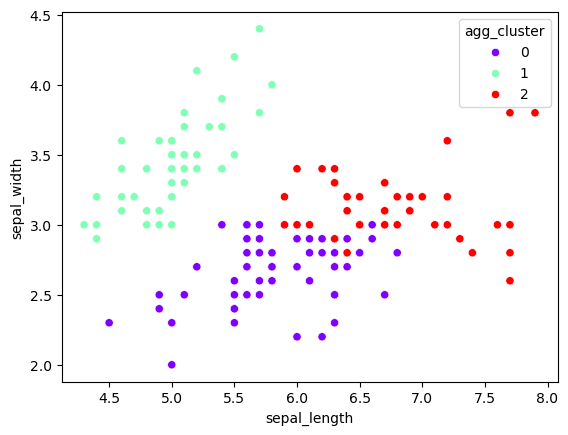

In [90]:
sns.scatterplot(x=features["sepal_length"],y=features["sepal_width"],hue=features["agg_cluster"],palette="rainbow")
plt.show()

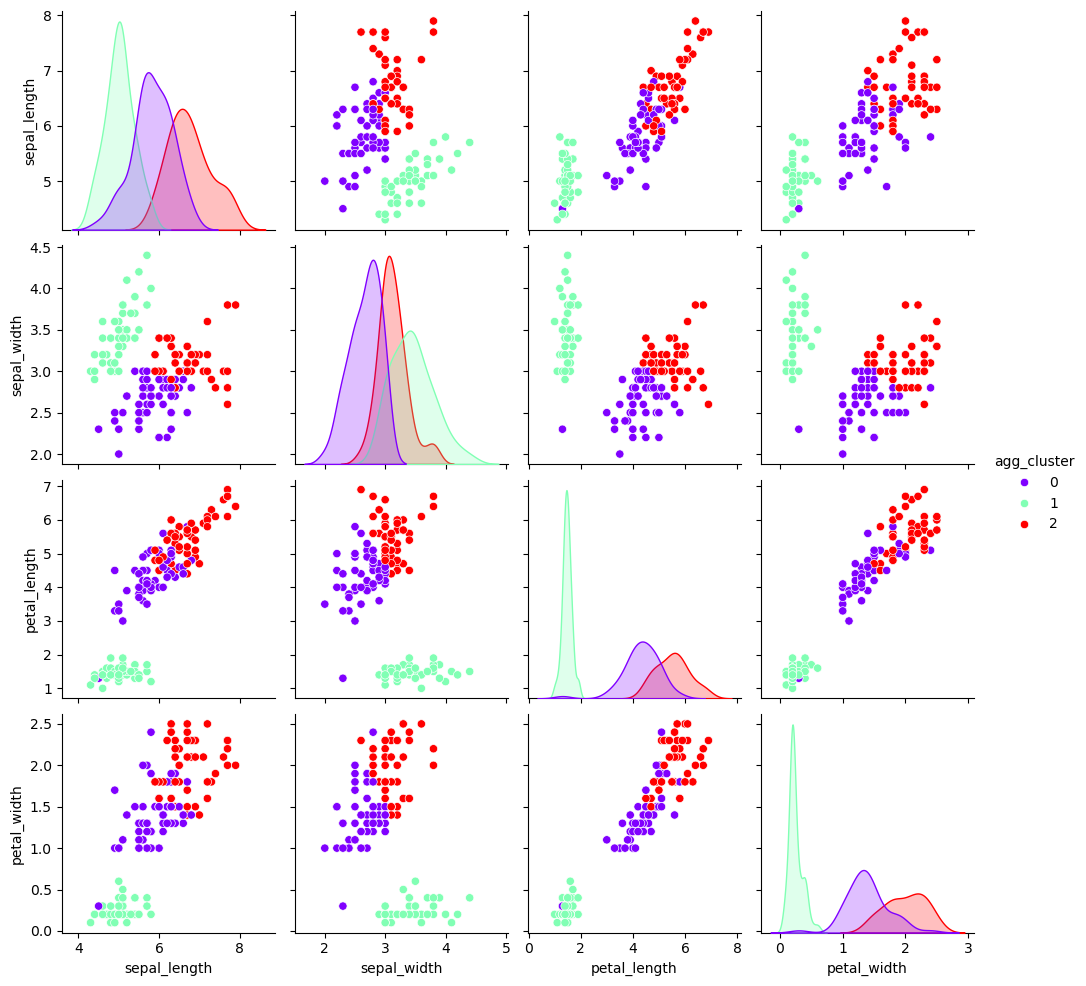

In [92]:
features=features.drop("kmeans_cluster",axis=1)
sns.pairplot(features,hue="agg_cluster",palette="rainbow")
plt.show()

In [94]:
features["kmeans_cluster"]=kmeans.fit_predict(scaled_features)
features

C:\Users\anjan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,agg_cluster,kmeans_cluster
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,0,2
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


In [96]:
from sklearn.metrics import silhouette_score
kmeans_silhoutte=silhouette_score(scaled_features,features["kmeans_cluster"])
Agglomerative_Clustering_silhoutte=silhouette_score(scaled_features,features["agg_cluster"])

print("silhouette score-K-Means Clustering:", kmeans_silhoutte)
print("silhouette score-Hierarchical Clustering:",Agglomerative_Clustering_silhoutte)

silhouette score-K-Means Clustering: 0.4627035355398659
silhouette score-Hierarchical Clustering: 0.46153313891231906
